In [11]:
%matplotlib inline

In [12]:
import mne
import os
import numpy as np

In [7]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████| Downloading : 1.54G/1.54G [01:22<00:00,    20.0MB/s]

Verifying hash 12b75d1cb7df9dfb4ad73ed82f61094f.


Decompressing the archive: C:\Users\Lenovo\mne_data\MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['C:\\Users\\Lenovo\\mne_data\\MNE-sample-data']
Attempting to create new mne-python configuration file:
C:\Users\Lenovo\.mne\mne-python.json


In [18]:
raw = mne.io.read_raw_fif(sample_data_raw_file, preload = True)

Opening raw data file C:\Users\Lenovo\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [22]:
raw.pick_types(meg = False, eeg = True, stim = True)

# From visually inspecting the data (below) the data is filtered at 0.1 Hz and 40 Hz

<Raw | sample_audvis_filt-0-40_raw.fif, 68 x 41700 (277.7 s), ~24.6 MB, data loaded>

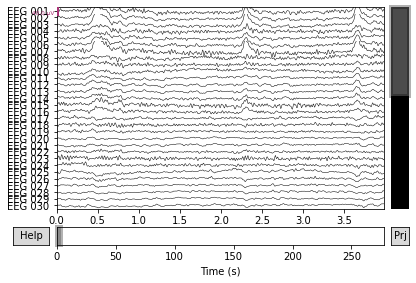

In [26]:
raw.plot(duration=4, n_channels=30);

Effective window size : 10.003 (s)


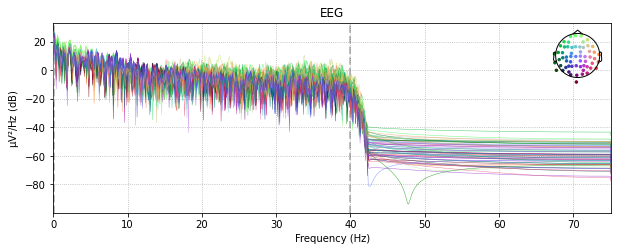

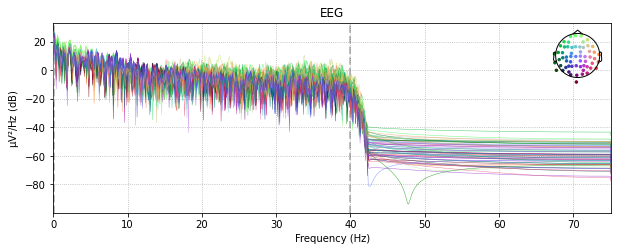

In [27]:
# Plotting the amplitudes (y-axis), for the different channels (color), over the different frequencies.
raw.plot_psd(area_mode='range', tmax=10.0, average=False) 

# Here it becomes apparent that there is a low-pass filter of roughly 40 -> amplitudes for frequencies above this are reduced greatly

In [ ]:
# Then making

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


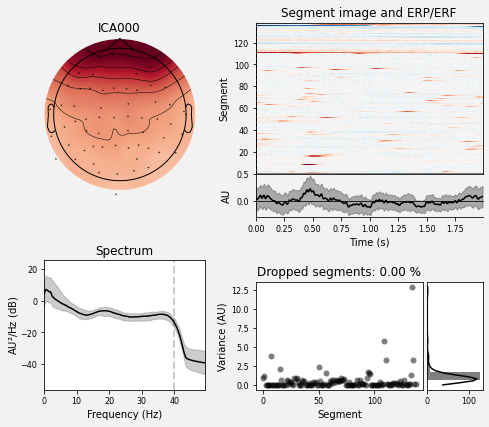

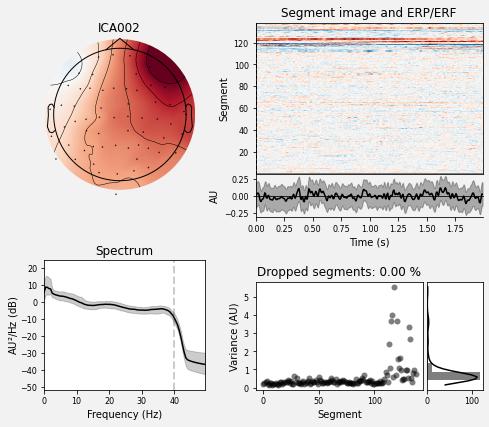

In [25]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [0, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude);

In [ ]:
ica.plot_components();

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

In [ ]:
# the stimulus channel on the Electra vector view is: STI 014
events = ???

In [ ]:
event_dict = {'auditory/left': 1,
              'auditory/right': 2,
              'visual/left': 3,
              'visual/right': 4,
              }

In [ ]:
reject_criteria = dict(eeg=150e-6)  # 150 µV


In [ ]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']